In [84]:
from typing import TypedDict, List, Annotated
from langchain_core.messages import HumanMessage, SystemMessage, BaseMessage, AIMessage
from langgraph.graph import END, START, StateGraph, add_messages
from langchain_groq import ChatGroq
from dotenv import load_dotenv

load_dotenv()

llm = ChatGroq(model="llama3-70b-8192")

class AgentState(TypedDict):
    messages: Annotated[list, add_messages]

In [85]:
from pydantic import BaseModel, Field

class Poem(BaseModel):
    """Output of a poem """
    poem : str = Field(...,description="let your output be about 50 words")

In [86]:

system_message = SystemMessage(content="output only the result response. do not add any prefix or suffix description to it")
def generate_post(state: AgentState) ->AgentState:
    result = llm.with_structured_output(Poem).invoke(state['messages'])
    # print(type(result),result.poem)
    return {
        "messages": [system_message, AIMessage(content=result.poem)]
    }
 

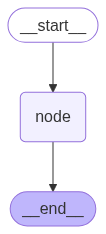

In [87]:
graph = StateGraph(AgentState)

graph.add_node("node", generate_post)
graph.add_edge(START, "node")
graph.add_edge("node", END)
app = graph.compile()
app

In [82]:
inputs = {
    "messages":[HumanMessage(content="write a poem about cats")]
}
result = app.invoke(inputs)

In [83]:
from IPython.display import display, Markdown
display(Markdown(result["messages"][-1].content))

Whiskers twitch, ears perk up high, eyes like jewels shine in the night sky. Soft and silent, they prowl around, rulers of the house, without a sound. Their little noses, pink and so fine, sniff out secrets, all the time. With a flick of their tail, they own the place, and with one purr, they steal our face.

{'messages': [HumanMessage(content='write a 3 line poem about cats', additional_kwargs={}, response_metadata={}, id='5fa0b91e-7766-411d-a8b5-b485f8757eb8'),
  SystemMessage(content='output only the result response. do not add any prefix or suffix description to it', additional_kwargs={}, response_metadata={}, id='70056bba-a8cb-4257-8e57-25003173790c'),
  AIMessage(content='Whiskers soft as silk\nEyes that shine like gold\nFurry friends so still', additional_kwargs={}, response_metadata={}, id='129d607f-208b-4e4a-a4d4-64b5fff7777e')]}